In [187]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [188]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# Reading data
loan = pd.read_csv("C:/Users/Aditya/Documents/Assignment/Gramener/loan.csv", low_memory=False)

In [190]:
#To know no.of rows & columns in a dataframe
loan.shape

(39717, 111)

In [191]:
#Verifying head of dataframe
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [193]:
#Finding how many unique id's are present in dataset. 
unique = loan['id'].unique()
len(unique)

#It is observed there are 39717 unique ID's which means there are no duplicates

39717

In [194]:
#Finding how many member_id's are present in dataset
unique1 = loan['member_id'].unique()
len(unique1)

39717

In [195]:
# Finding column-wise null percentage
round(100*(loan.isnull().sum(axis=0)/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [196]:
#Dropping columns which has 100% null values
loan = loan.dropna(axis=1,how='all')
loan.shape

(39717, 57)

In [197]:
#Knowing percentage of missing values which have large percentage (greater than 5%) of Null values. 
100*(len(loan[loan.isnull().sum(axis=1) >5].index)/len(loan.index))

0.6621849585819674

In [198]:
# Dropping the rows here using columns with high Null percentages
loan = loan[loan.isnull().sum(axis=1) <=5]

#Verify result
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [199]:
#Knowing percentage of missing values after dropping
100*(len(loan[loan.isnull().sum(axis=1) >5].index)/len(loan.index))

0.0

In [200]:
###### Dropping the unnecessary columns
# Member ID is not required as it is a borrower level
# Ccollections_12_mths_ex_med, tax_liens, chargeoff_within_12_mths has only 2 values 0 & NA so can remove these columns
# Interest rate depends on Loan grade and subgrade. Hence we can remove interest column as we can use grades for analysis
# As there are both zip code and state we can retain addr_state column and delete zip_code
# 'desc' column is mostly used while doing text analysis as we wre not doing it here we can safely remove it
# We have 2 columns 'purpose' and 'title' which is essentially giving same information so we can remove 'title'
# 'url' is not useful for analysis

loan = loan.drop(['member_id','pymnt_plan', 'url', 'desc', 'zip_code', 'total_acc', 'title', 
                  'initial_list_status', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                  'collection_recovery_fee', 'collections_12_mths_ex_med', 'policy_code',
                'tax_liens', 'pub_rec_bankruptcies', 'chargeoff_within_12_mths', 'int_rate'], axis=1)
round(100*(loan.isnull().sum(axis=0)/len(loan.index)),2)

id                         0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  5.59
emp_length                 2.10
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.45
mths_since_last_record    92.96
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.11
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_pymnt_inv            0.00
last_pym

In [201]:
#To know no.of rows & columns in a dataframe after removing
loan.shape

(39454, 38)

In [202]:
#Checking info on loan dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39454 entries, 0 to 39716
Data columns (total 38 columns):
id                        39454 non-null int64
loan_amnt                 39454 non-null int64
funded_amnt               39454 non-null int64
funded_amnt_inv           39454 non-null float64
term                      39454 non-null object
installment               39454 non-null float64
grade                     39454 non-null object
sub_grade                 39454 non-null object
emp_title                 37249 non-null object
emp_length                38624 non-null object
home_ownership            39454 non-null object
annual_inc                39454 non-null float64
verification_status       39454 non-null object
issue_d                   39454 non-null object
loan_status               39454 non-null object
purpose                   39454 non-null object
addr_state                39454 non-null object
dti                       39454 non-null float64
delinq_2yrs               

In [203]:
#Changing format of date related columns 'issue_d' & 'last_pymnt_d'
loan['issue_d'] = pd.to_datetime(loan['issue_d'].str.upper(), format = '%b-%y',yearfirst=False)
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'].str.upper(), format = '%b-%y',yearfirst=False)

In [204]:
#Create new columns which are helpful in analysis of issue_year & month
loan['issue_year'] = loan['issue_d'].dt.year
loan['issue_month'] = loan['issue_d'].dt.month


In [205]:
#Create new columns which are helpful in analysis of last_pymnt_year & month
loan['last_pymnt_year'] = loan['last_pymnt_d'].dt.year
loan['last_pymnt_month'] = loan['last_pymnt_d'].dt.month
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,issue_year,issue_month,last_pymnt_year,last_pymnt_month
0,1077501,5000,5000,4975.0,36 months,162.87,B,B2,NaN,10+ years,...,171.62,NaN,May-16,INDIVIDUAL,0,0,2011,12,2015.0,1.0
1,1077430,2500,2500,2500.0,60 months,59.83,C,C4,Ryder,< 1 year,...,119.66,NaN,Sep-13,INDIVIDUAL,0,0,2011,12,2013.0,4.0
2,1077175,2400,2400,2400.0,36 months,84.33,C,C5,NaN,10+ years,...,649.91,NaN,May-16,INDIVIDUAL,0,0,2011,12,2014.0,6.0
3,1076863,10000,10000,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,357.48,NaN,Apr-16,INDIVIDUAL,0,0,2011,12,2015.0,1.0
4,1075358,3000,3000,3000.0,60 months,67.79,B,B5,University Medical Group,1 year,...,67.79,Jun-16,May-16,INDIVIDUAL,0,0,2011,12,2016.0,5.0


In [206]:
#Cleaning the emp_title column by converting values to upper case
#Later we will use this in subsequent visualizations to check chargedoff loans w.r.t emp_title
loan['emp_title'] = loan['emp_title'].str.upper()
loan.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,issue_year,issue_month,last_pymnt_year,last_pymnt_month
0,1077501,5000,5000,4975.0,36 months,162.87,B,B2,NaN,10+ years,...,171.62,NaN,May-16,INDIVIDUAL,0,0,2011,12,2015.0,1.0
1,1077430,2500,2500,2500.0,60 months,59.83,C,C4,RYDER,< 1 year,...,119.66,NaN,Sep-13,INDIVIDUAL,0,0,2011,12,2013.0,4.0
2,1077175,2400,2400,2400.0,36 months,84.33,C,C5,NaN,10+ years,...,649.91,NaN,May-16,INDIVIDUAL,0,0,2011,12,2014.0,6.0
3,1076863,10000,10000,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,357.48,NaN,Apr-16,INDIVIDUAL,0,0,2011,12,2015.0,1.0
4,1075358,3000,3000,3000.0,60 months,67.79,B,B5,UNIVERSITY MEDICAL GROUP,1 year,...,67.79,Jun-16,May-16,INDIVIDUAL,0,0,2011,12,2016.0,5.0


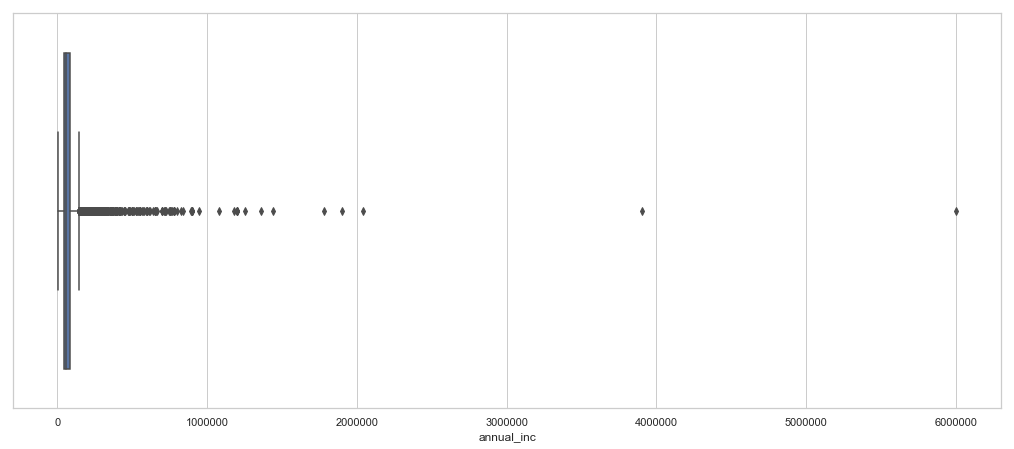

In [207]:
#Univariate analysis on'annual_inc' using a box plot. 
#From below plot it can be observed that there are outliers.

sns.boxplot(x= 'annual_inc', data = loan, orient= 'h')

In [208]:
# To treat outliers we will deal them using zscore. We consider 3 is the threshold in number of standard deviations away from the mean

loan_annualinc = loan[((loan['annual_inc'] - loan['annual_inc'].mean()) / loan['annual_inc'].std()).abs() < 3]


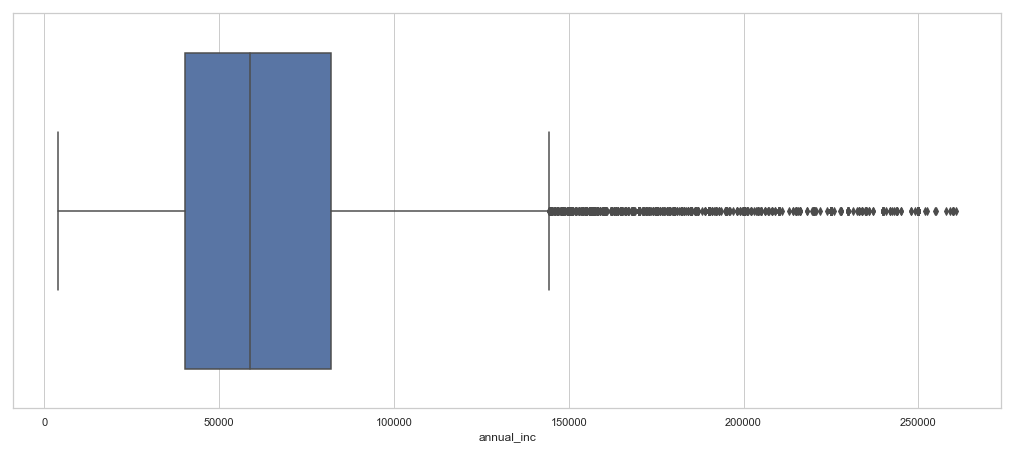

In [209]:
#Univariate analysis- Verifying the boxplot after removing outliers based on z-score

sns.boxplot(x= 'annual_inc', data = loan_annualinc, orient= 'h')

In [210]:
#Still we have outliers. So finding lower and upper bound for outliers in annual_inc
lower_bound = 0.1
upper_bound = 0.95
res = loan['annual_inc'].quantile([lower_bound, upper_bound])
res

#Finding true and false index 
true_index= (res.loc[lower_bound] < loan['annual_inc'].values) & (loan['annual_inc'].values < res.loc[upper_bound])
loan.annual_inc[true_index]

false_index = ~true_index

In [211]:
#Imputing outliers in 'annual_inc' colummn with median
#Find median value
median = np.median(loan.annual_inc[true_index])
median

#Impute false_index with median value
loan.annual_inc[false_index] = median

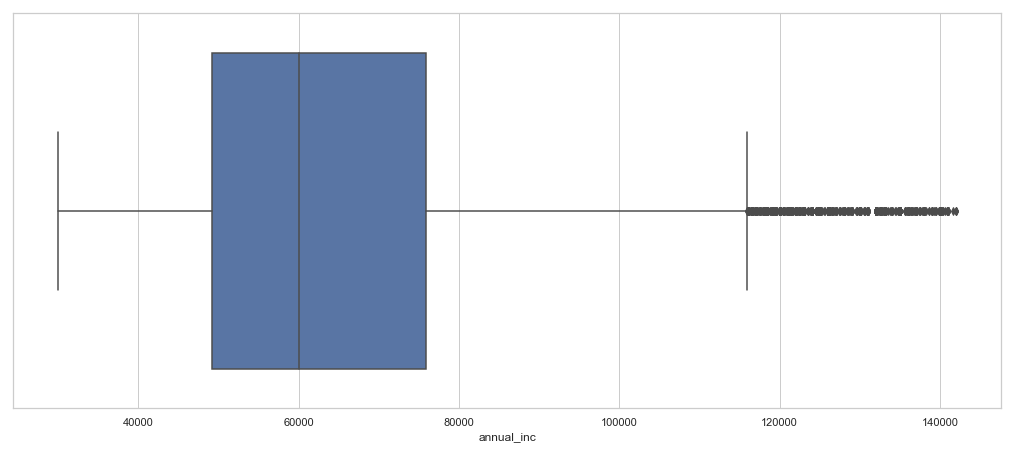

In [212]:
#Univariate analysis- Verifying the boxplot after removing outliers 
sns.boxplot(x= 'annual_inc', data = loan, orient= 'h')

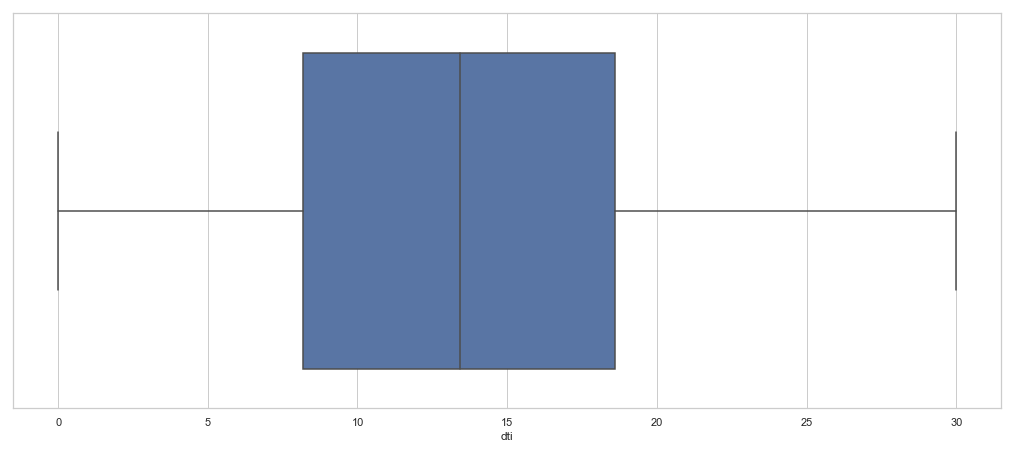

In [213]:
#Univariate analysis- Verifying the boxplot for dti
sns.boxplot(x= 'dti', data = loan, orient= 'h')

Text(0.5, 1.0, 'Year wise loan issue analysis')

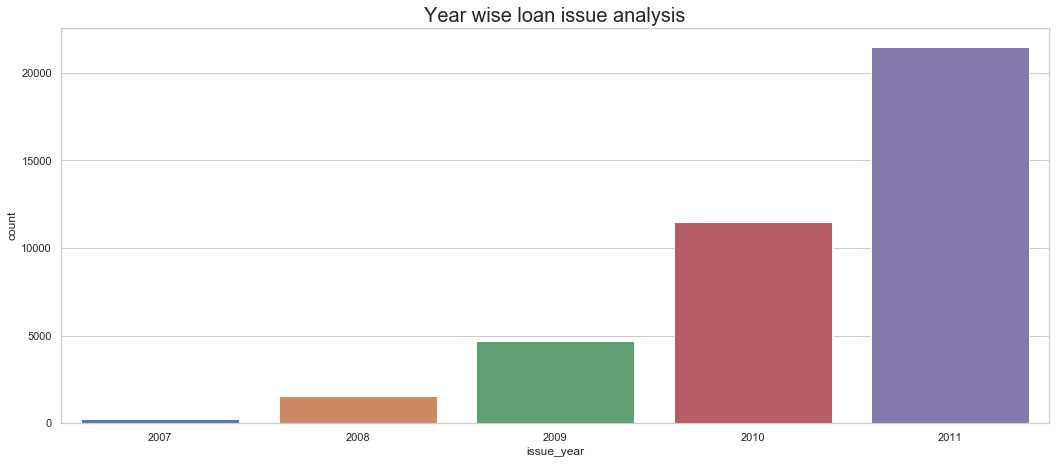

In [214]:
#Univariate analysis of issue_year
countplot_issueyear = sns.countplot(x='issue_year', data=loan)

plt.title('Year wise loan issue analysis',fontsize=20)

Text(0.5, 1.0, 'Statewise applicants')

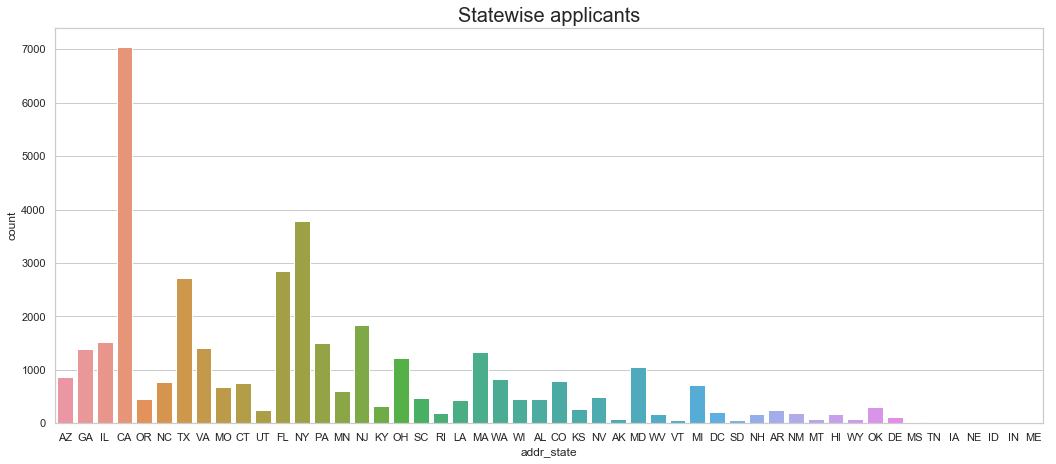

In [215]:
#Univariate analysis- Visualize number of applicants on 'addr_state' 
countplot = sns.countplot(x='addr_state', data=loan)

plt.title('Statewise applicants',fontsize=20)

In [216]:
# From the above visualization it is evident that CA, NY & FL are top 3 states which has more number of applcants

Text(0.5, 1.0, 'Loan purpose visualization')

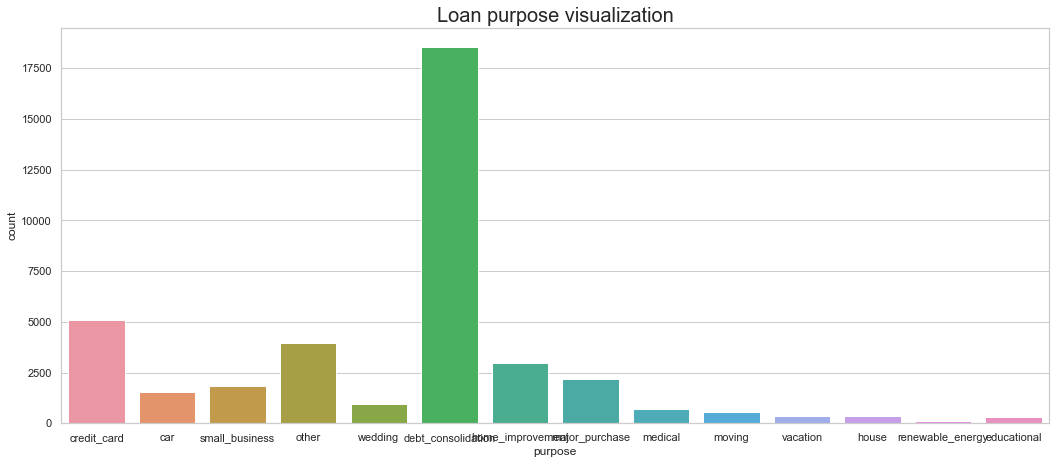

In [217]:
#Visualize purpose of loans
countplot_purpose = sns.countplot(x='purpose', data=loan)
plt.title('Loan purpose visualization',fontsize=20)

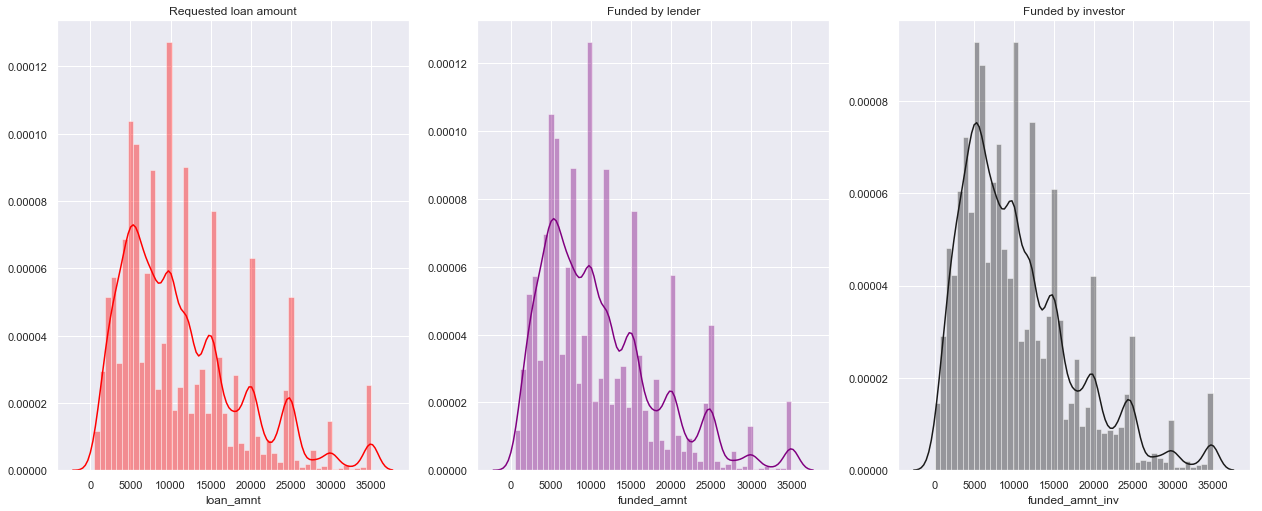

In [134]:
#Visualizing distribution of loan attribute variables 'loan_amnt', 'funded_amnt', 'funded_amnt_inv'
sns.set(rc={'figure.figsize':(17.7,7.27)})

SP1 = plt.subplot(1, 3, 1)
sns.distplot(loan['loan_amnt'], color="red")
plt.title('Requested loan amount')


SP2 =plt.subplot(1, 3, 2)
sns.distplot(loan['funded_amnt'],color="purple")
plt.title('Funded by lender')


SP3 = plt.subplot(1, 3, 3)
sns.distplot(loan['funded_amnt_inv'],color="k")
plt.title('Funded by investor')

#To avoid opverlapping of the plots
plt.tight_layout()

In [135]:
#From the above visualization it is clear that loan amount, funded amount by lender and amount committed by investors are almost 
#equally distributed and it shows there is sufficient balance between credit and funding

In [218]:
#To observe type of ownership for charged off loans & Fully paid loans we will create new data sets for chargedoff, fullypaid  
# and one more with chargedoff+fullypaid by excluding 'Current'

loans_chargeoff = loan.loc[loan['loan_status'] == 'Charged Off']
loans_fullypaid = loan.loc[loan['loan_status'] == 'Fully Paid']
loans_notcurrent = loan.loc[loan['loan_status'] != 'Current']


Text(0.5, 1.0, 'Loan status by ownership')

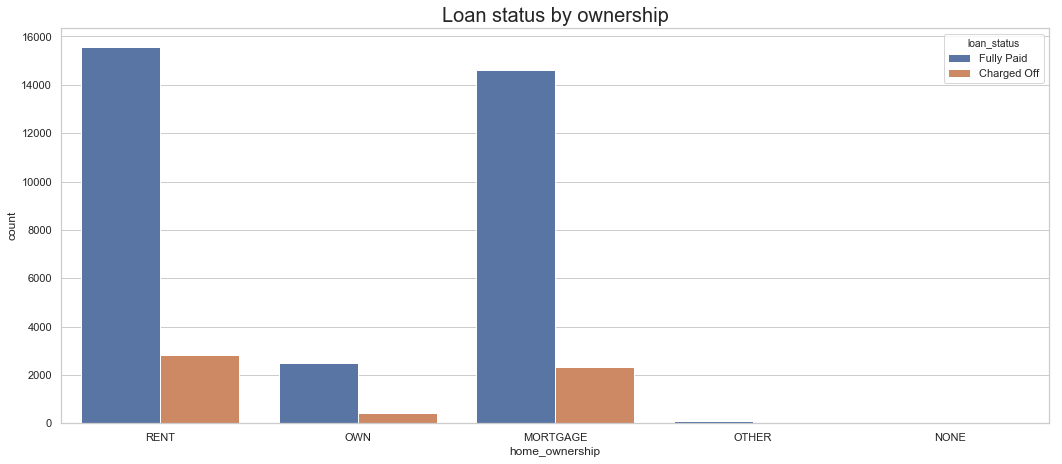

In [219]:
#Bivariate analysis on home ownership for Charged off loans & Fully paid loans
sns.countplot(x='home_ownership', hue='loan_status', data=loans_notcurrent)
plt.title('Loan status by ownership',fontsize=20)

Text(0.5, 1.0, 'Charged off by ownership')

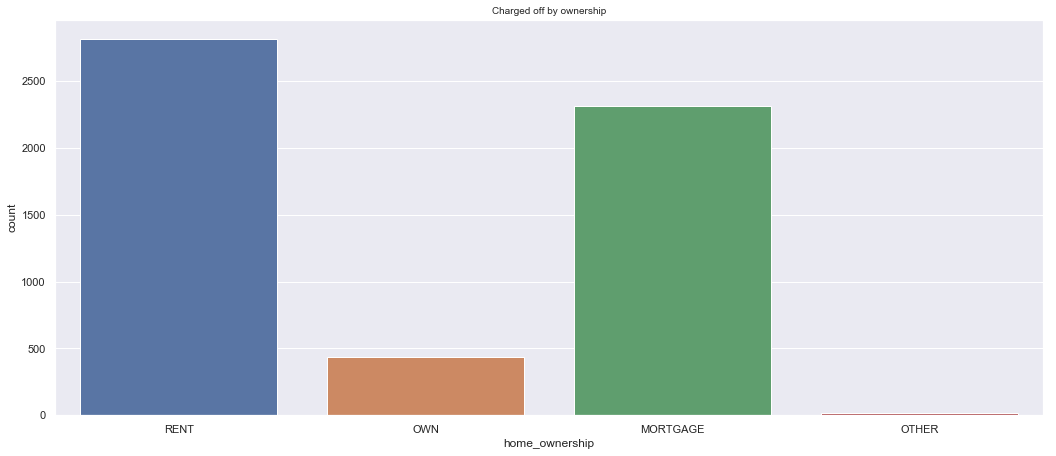

In [138]:
#Bivariate analysis on home ownership only for Charged off loans
sns.countplot(x='home_ownership', data=loans_chargeoff)
plt.title('Charged off by ownership',fontsize=10)

In [139]:
#From the above plot it is evident that applicants with 'Rent' & 'Mortgage' as a value are more likely to default when compared to Own house applcants

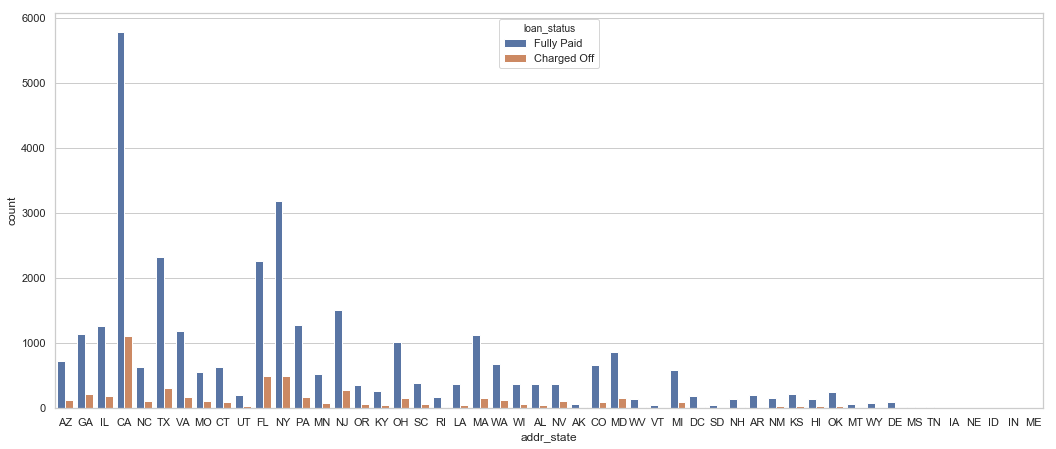

In [220]:
# Plot the statewise loan_status except 'current'
countplot_state = sns.countplot(x='addr_state', hue = 'loan_status', data=loans_notcurrent)


Text(0.5, 1.0, 'Loan purpose_Chargedoff')

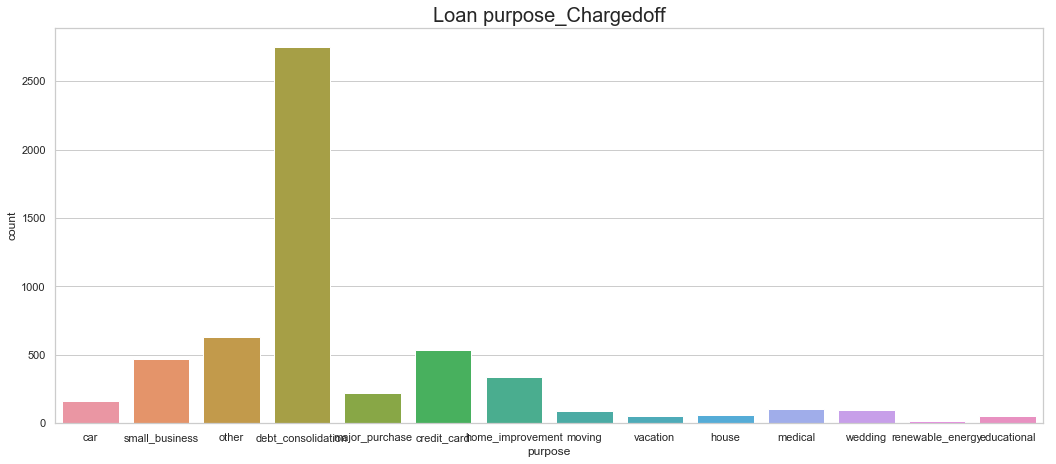

In [221]:
#Visualize purpose of loans for chargedoff
countplot_chargedoff = sns.countplot(x='purpose', data=loans_chargeoff)
plt.title('Loan purpose_Chargedoff',fontsize=20)

In [222]:
# From the above plot it is evident that debt_consolidation, other and credit card purpose loans are top3 defaulters
# Debt consolidation itself contributes ~47% of charged off loans
# Subsequently credit card is contriuting ~13% and other at ~10%

Text(0.5, 1.0, 'Charged off w.r.t loan term')

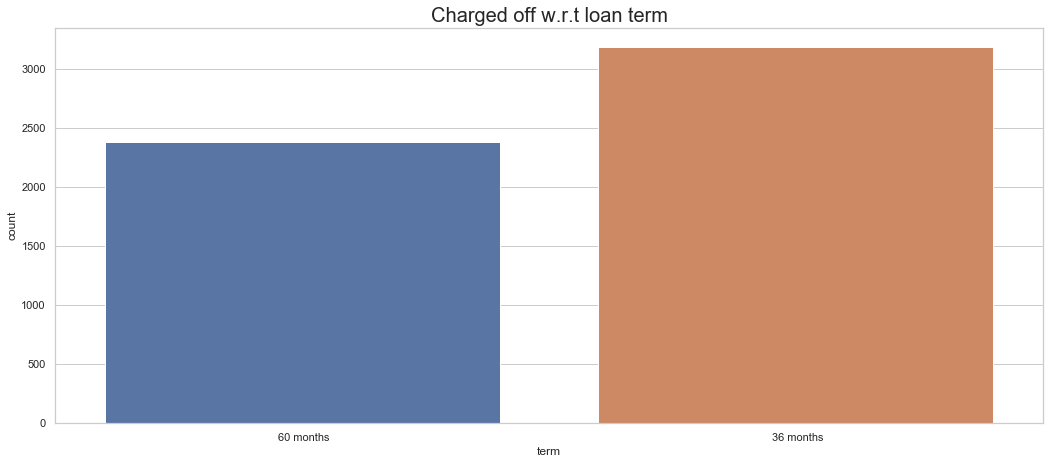

In [223]:
#Now lets visualize loan term w.r.t charged off loans
sns.countplot(x='term', data=loans_chargeoff)
plt.title('Charged off w.r.t loan term',fontsize=20)

Text(0.5, 1.0, 'Charged off w.r.t grades')

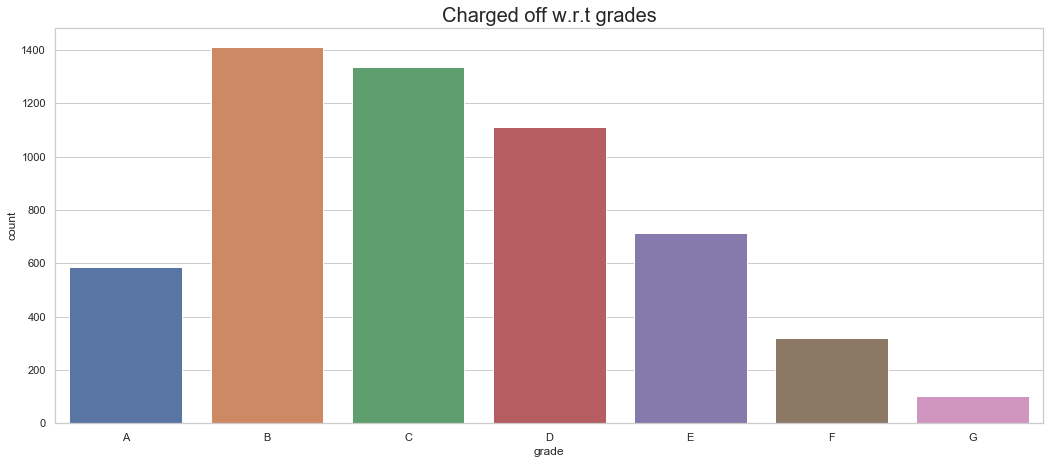

In [224]:
#Now lets visualize amount of charged off loans according to grades 
sns.countplot(x='grade', data=loans_chargeoff, order=["A", "B", "C", "D", "E", "F", "G"])
plt.title('Charged off w.r.t grades',fontsize=20)

In [225]:
# As per industry expectation grades from A to C are considered as low risk and D to G are considered as High risk.
# But from the above plot it can be observed that Grades B, C & D are having maximum defaulters
# Out of 5576 total charged off loans below is the percentage of defaulters in each grade
#Grade 	Percentage
#A	10.51%
#B	25.30%
#C	23.96%
#D	19.92%
#E	12.79%
#F	5.70%
#G	1.81%


Text(0.5, 1.0, 'fully paid w.r.t grades')

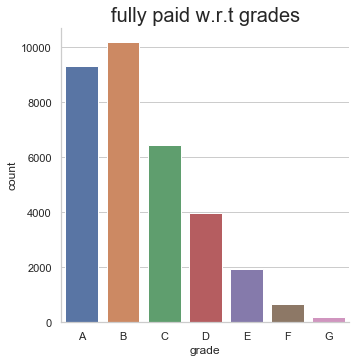

In [226]:
#Now lets visualize amount of fully paid loans according to grades 
sns.catplot(x='grade', kind= 'count', data=loans_fullypaid, order=["A", "B", "C", "D", "E", "F", "G"])
plt.title('fully paid w.r.t grades',fontsize=20)

Text(0.5, 1.0, 'Charged off w.r.t emp_length')

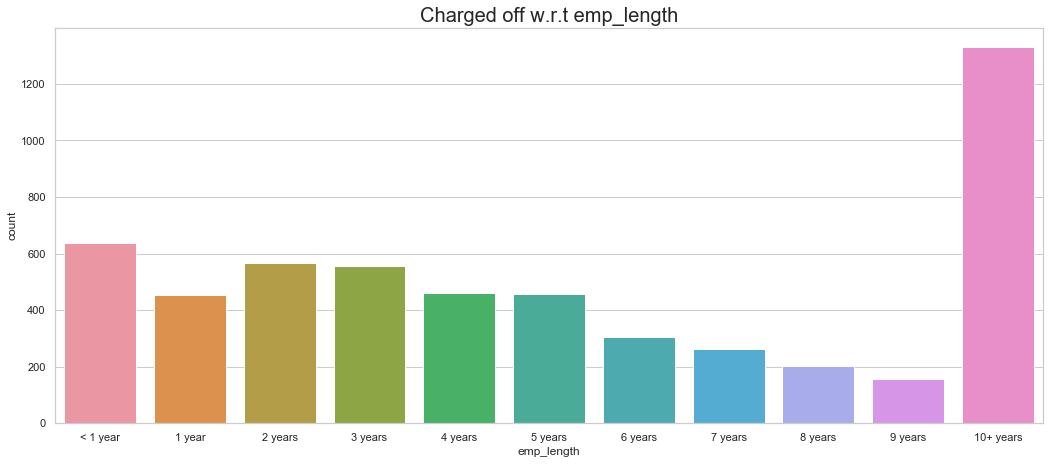

In [227]:
#Now lets visualize amount of charged off loans according to employee length of service.
countplot_emp_length = sns.countplot(x='emp_length', data=loans_chargeoff, order=["< 1 year", "1 year", "2 years", 
                                    "3 years", "4 years", "5 years", "6 years","7 years", "8 years", "9 years", "10+ years"])

plt.title('Charged off w.r.t emp_length',fontsize=20)

In [228]:
# From the above plot it is evident that employees with terms 10+years, <1 year & 2 years are major defaulters with below %.
#Term	Percentage
#10+ years	24.67%
#< 1 year	11.84%
#2 years	10.51%
#Total	47.02%



Text(0.5, 1.0, 'Charged off w.r.t open_acc')

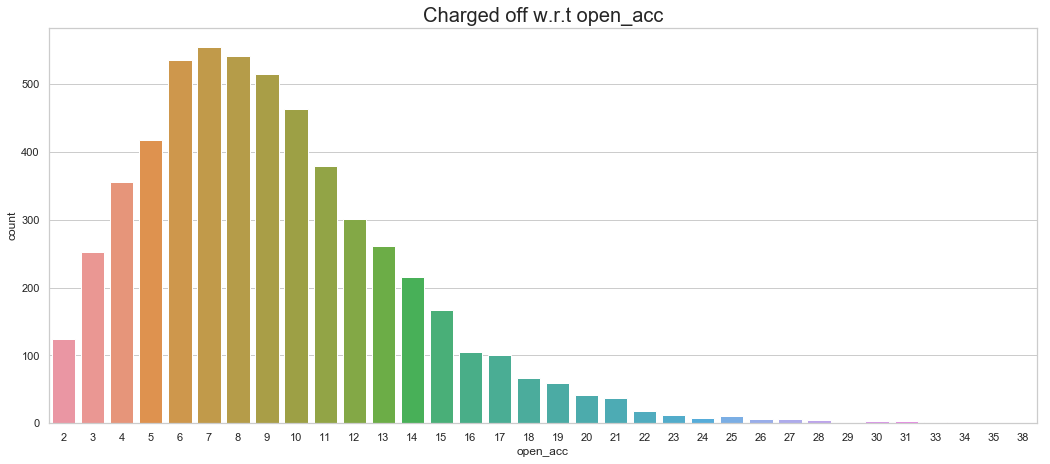

In [229]:
#Now lets visualize amount of charged off loans according to open_acc
countplot_open_acc = sns.countplot(x='open_acc', data=loans_chargeoff)

plt.title('Charged off w.r.t open_acc',fontsize=20)

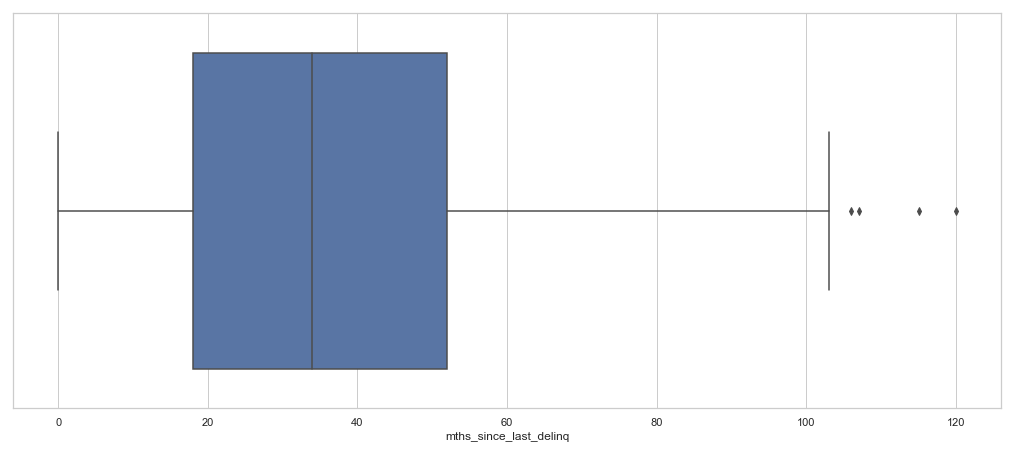

In [230]:
#Univariate analysis by verifying the boxplot for 'mths_since_last_delinq'

sns.boxplot(x= 'mths_since_last_delinq', data = loan, orient= 'h')

Text(0.5, 1.0, 'loan_status for charged off w.r.t verification_status')

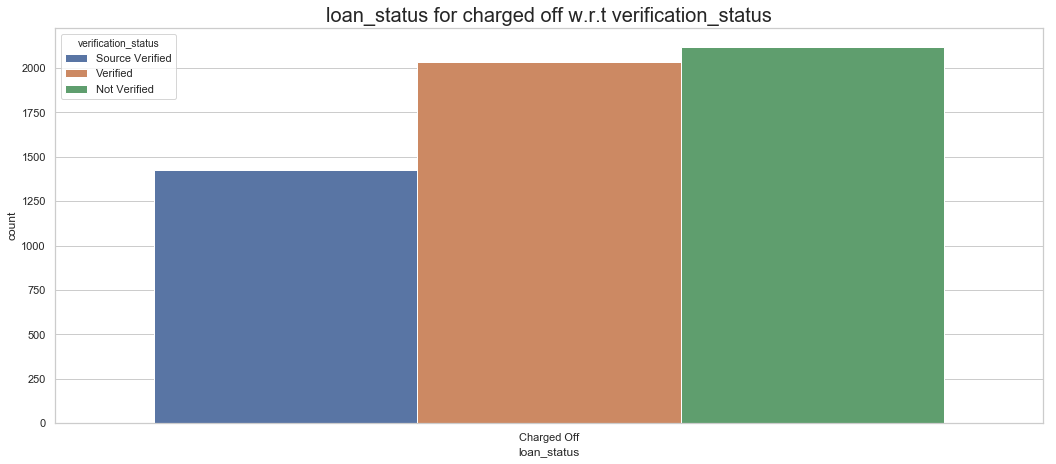

In [231]:
#Bivariate analysis of loan_status for charged off w.r.t 'verification_status'

sns.countplot(x='loan_status', hue='verification_status', data=loans_chargeoff)

plt.title('loan_status for charged off w.r.t verification_status',fontsize=20)

In [232]:
#Charged off loans high for both Not Verified and Verified
#38% of not verified and 36.5% of verified status are charged off which is alarming. Verification process should be reviewed

Text(0.5, 1.0, 'Loan status w.r.t purpose')

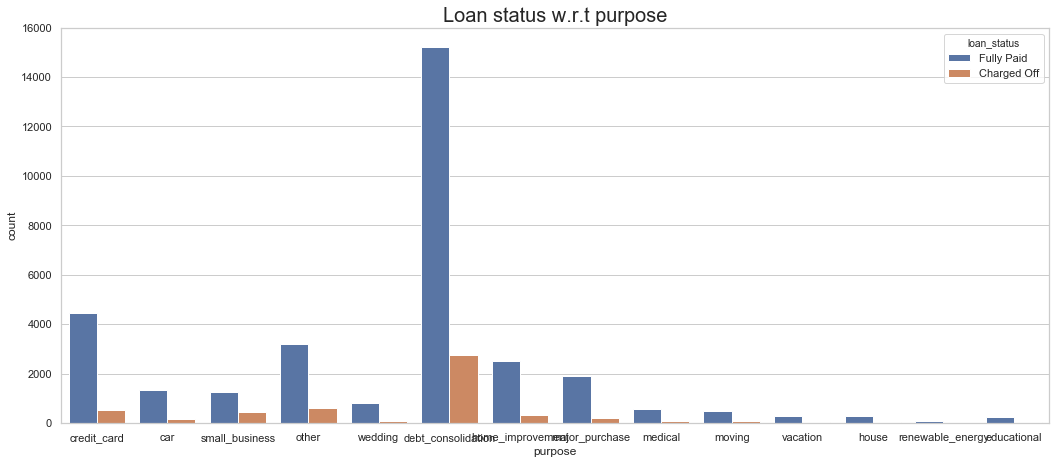

In [233]:
#Bivariate analysis of loan_status wr.r.t purpose
countplot_bipurpose= sns.countplot(x='purpose', hue= 'loan_status', data=loans_notcurrent)

plt.title('Loan status w.r.t purpose',fontsize=20)


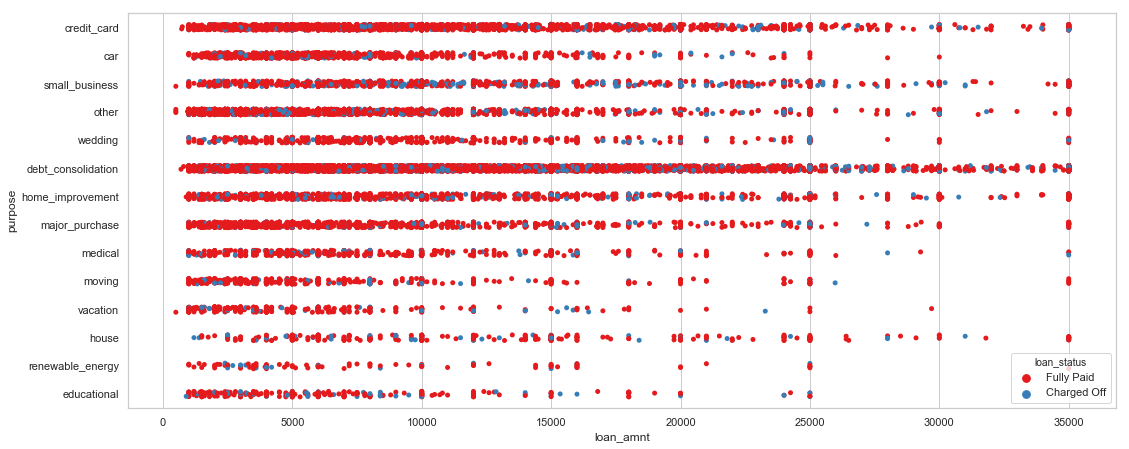

In [235]:
#Multivariate stripplot using 3 variables purpose, loan_status & loan_amount
sns.set(style="whitegrid")
sns.stripplot(y="purpose", x="loan_amnt", hue="loan_status", data=loans_notcurrent,palette="Set1" , jitter=True)

In [236]:
#There are some titles in different formats change them into a single format
title = loans_chargeoff
title["emp_title"]= title["emp_title"].replace("US POSTAL SERVICE", "USPS") 
title["emp_title"]= title["emp_title"].replace("UNITED STATES POSTAL SERVICE", "USPS") 
title["emp_title"]= title["emp_title"].replace("UNITED STATE POSTAL SERVICE", "USPS") 
title["emp_title"]= title["emp_title"].replace("U.S.POSTAL SERVICE", "USPS") 
title["emp_title"]= title["emp_title"].replace("U.S POSTAL SERVICE", "USPS") 
title["emp_title"]= title["emp_title"].replace("US ARMY", "ARMY") 
title["emp_title"]= title["emp_title"].replace("U.S. ARMY", "ARMY") 
title["emp_title"]= title["emp_title"].replace("WAL-MART", "WALMART") 
title["emp_title"]= title["emp_title"].replace("SELF EMPLOYED", "SELF")
title["emp_title"]= title["emp_title"].replace("UNITED STATES AIR FORCE", "USAF")
title["emp_title"]= title["emp_title"].replace("US AIR FORCE", "USAF")
title["emp_title"]= title["emp_title"].replace("UNITED STATES NAVY", "NAVY")
title["emp_title"]= title["emp_title"].replace("U.S. NAVY", "NAVY")
title["emp_title"]= title["emp_title"].replace("US NAVY", "NAVY")
title["emp_title"]= title["emp_title"].replace("DEPT OF THE NAVY", "NAVY")
title["emp_title"]= title["emp_title"].replace("THE HOME DEPOT", "HOME DEPOT")
title["emp_title"]= title["emp_title"].replace("UNITED PARCEL SERVICE", "UPS")

Text(0.5, 1.0, 'charged off w.r.t emp_title')

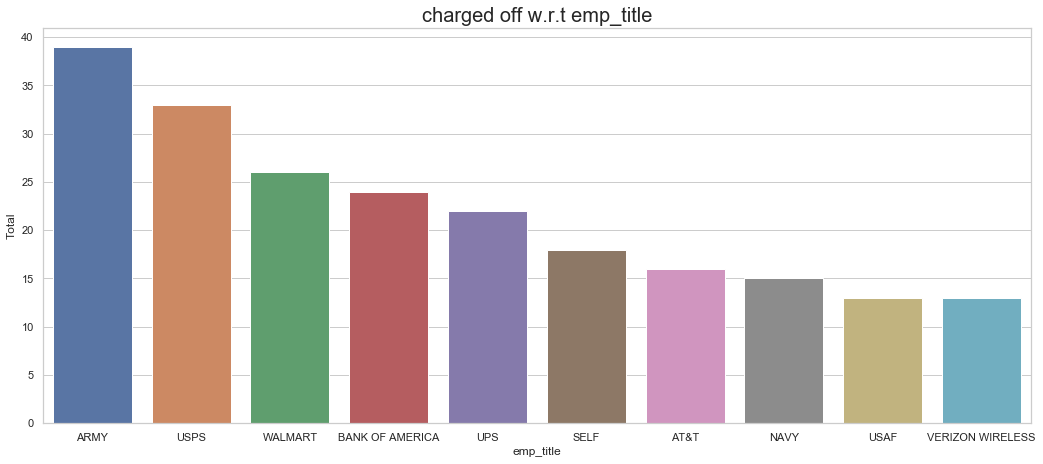

In [237]:
#Segmented univariate analysis- Find total chargedoff  loans grouped by emp_title
title = title.groupby(['emp_title'])
title = title['loan_status'].count().reset_index(name='Total')
title = title.sort_values('Total',ascending=False)
title = title.head(10)

#Visualize the charged off loans according to emp_title
countplot_emp_title= sns.barplot(x='emp_title', y= 'Total',data=title)

plt.title('charged off w.r.t emp_title',fontsize=20)

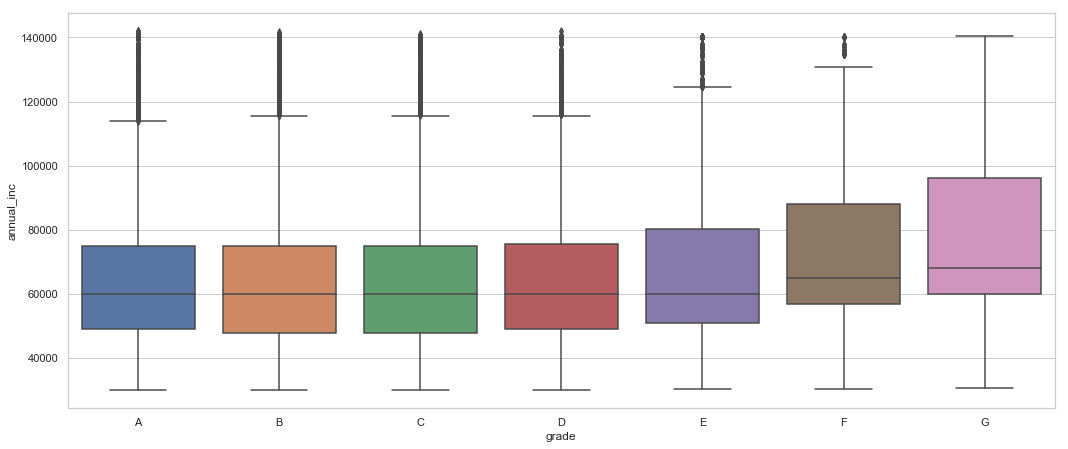

In [183]:
#Bivariate analysis of grades w.r.t annual_inc
sns.boxplot(x='grade', y= 'annual_inc', data=loan, order=["A", "B", "C", "D", "E", "F", "G"])

#From the below plot is observed that Mean annual_inc for A,B,C,D remains same where as, it gradually increases from E to G